                                             Workshop 4: Dragos Gruia and Valentina Giunchiglia

# Introduction to structural and functional MRI analysis in Python

The aim of the lecture of today is to introduce you to the analysis of structural and functional MRI data using Python. You should know this by now thanks to the introductory lecture, but essentially the fundamental difference between structural and functional MRI is the following:

- **Structural MRI**: provides information about the anatomy and pathology of the brain
- **Functional MRI**: provides information about the brain activity

In the workshop of today, we will teach you how to manage and understand these imaging data, and how to conduct some basic analysis. 


The data for the lecture of today are saved in the format of a `pickle` object. Pickle is a module in python that can be used to store and save python objects, in the `pickle` format. The first thing you need to do is to import the module, together with other modules you will need in the workshop.

In [183]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pickle
import seaborn as sb
import pandas as pd
%matplotlib inline
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

sb.set_theme("talk")
sb.set_style("whitegrid")

To open and save python objects in the pickle format, you need to use `context managers`, which you should have learnt during the first lecture of the primer material. Let's start by loading the fMRI (functional MRI) and sMRI (structural MRI) data.

In [184]:
with open('Data/fmri_day4.pickle', 'rb') as handle:
    fmri = pickle.load(handle)
    
with open('Data/smri_day4.pickle', 'rb') as handle:
    smri = pickle.load(handle)

## Visualize and understand sMRI data

Let's start by looking at the sMRI data. The first thing we can do is to check out the shape and type of the object.

In [185]:
smri.shape, type(smri)

((256, 256, 54), numpy.ndarray)

As you can see `smri` is a 3 dimensional array, with dimensions 256, 256 and 54. The reason why we have 3D is that the brain is in 3D! When we represent and study the brain, we can consider it in terms of **voxels**. Voxels represent a tiny cube of brain tissue and correspond to the smallest piece you can split a brain into. To understand this better, look at the following figure. Each one of these small cube is a voxel. If you want to specify the exact location of the voxel in the brain, since it is in 3D, you have to provide the x, y and z coordinates, which correspond to the 3 dimensions of your array. 

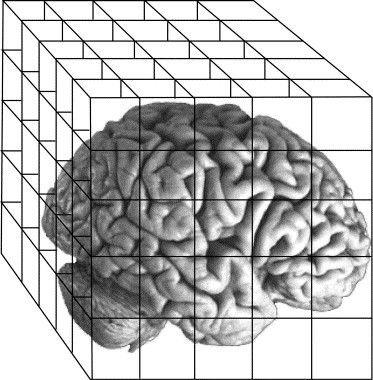

**What are these dimensions?**

You can imagine that the brain is made up of multible brain slices. Each one of these brain slices is a 2D plane. This is where the x and y dimension come from, which tell you where in the plane the voxel is located. You can also think of the x and y coordinates as the width and height of a brain slice. If you put all these separate slices together, you get the 3D brain. The z dimension specifies to which slice of the brain the voxel belongs.

The values of the array represent the signal of each voxel, the higher is the number, the stronger is the signal. In Python, if you want to extract the signal of a specific voxel, you have to provide exact x, y and z coordinates. Let's try to extract the signal in x=100, y=100 and z=10.

In [186]:
smri[100, 100, 10]

832.0

You always have to provide the x, y and z coordinates in this order.

Now try to change the values to x = 20, y = 20 and z = 10. Why do you think that is the result you get?

In [187]:
# CODE HERE

When we think about sMRI images, however, we are more interested in extracting collection of voxels, maybe a 2D brain slice or a 1D set of voxels. 
If you want to extract all voxels along the x axis, then you have to select all values in x. If you remember from the primer, you can do that by using `:`.

In [188]:
smri[:, 100, 10]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,   40.,   40.,   24.,    8.,
         40.,    8.,   40.,   24.,    0.,   40.,   32.,   32.,    0.,
         16.,   40.,   24.,   24.,   32.,   56.,   40.,  216.,  808.,
        944.,  776.,  768.,  664.,  480.,  288.,  176.,  440.,  712.,
        720.,  776.,  840.,  736.,  312.,   40.,   32.,   56.,   72.,
        120.,  320.,  464.,  416.,  344.,  464.,  536.,  384.,  296.,
        544.,  608.,  576.,  672.,  624.,  552.,  624.,  624.,  600.,
        720.,  760.,  768.,  824.,  824.,  792.,  792.,  840.,  832.,
        848.,  832.,  832.,  864.,  880.,  896.,  888.,  920.,  944.,
        920.,  920.,  920.,  936.,  928.,  888.,  912.,  904.,  920.,
        872.,  816.,  856.,  808.,  728.,  712.,  736.,  712.,  536.,
        472.,  520.,

How should you change the code to extract all values along the y axis, and the z axis?
Try to check the shapes of these arrays. Is it as you expect it? Why?

In [189]:
# CODE HERE


Now let's try to extract an entire brain slice in 2D. When you look at the brain, you can think of three possible planes: sagittal, coronal and axial, as shown in the Figure. 
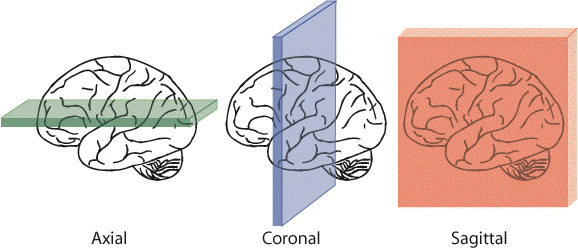

Let's try to visualize these planes in our images. To visualize 2D arrays in python, matplotlib has a ready to use function called  `imshow ` that takes as an argument the 2D array, together with additional arguments about, for example, the colour map to use (`cmap`)

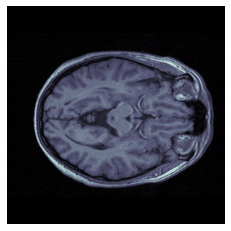

In [190]:
plt.imshow(smri[:,:,20], cmap='bone')
_ = plt.axis("off")

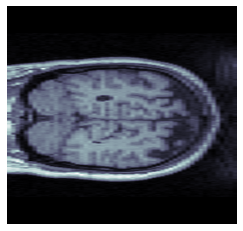

In [191]:
plt.imshow(smri[:,80,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

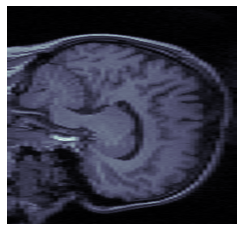

In [192]:
plt.imshow(smri[120,:,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

Can you understand which plane each image represents?

-------
### Code here

Let's try to see what happens if you change the coordinate number along one of the planes of your choice. Plot a figure with 6 suplots where each suplot represents a 2D section of the brain at different coordinates.
Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

In [193]:
## Code here


------

## Visualize and understand fMRI data

Let's start by looking at the shape of fMRI data. How is it different from sMRI?

In [194]:
fmri.shape

(16, 16, 16, 96)

As you can see, fMRI data are 4 dimensional arrays. The first three dimensions are the same as sMRI. The fourth dimension is **time**. As we mentioned at the beginning of the tutorial, fMRI measures brain activity, so we are interested in how brain activity changes over time rather than at one specific point. With sMRI, we don't expect the structure of the brain to change from one moment to the other, so we only obtain one value for each voxel. There are two possible types of fMRI: **task** and **resting state** fMRI. Task fMRI measures brain activity as participants are completing a task, while resting state fMRI examines changes in the brain while participants are at rest. Since fMRI measures changes in time, it is necessary to take multiple images of the brain throughout time. As the fourth dimension is equal to 96, it means that our data contains 96 3D images of the brain, collected at 96 different timepoints.

An easy way to visualize the timecourse, or change in voxel signal, throughout time is to plot it. To do it, you have to select specific x, y and z coordinates (that specify which voxel you want to look at), and then keep all the values in the time dimension, which means that you are looking at the signal value of the x,y,z voxel throughout time.

Text(0, 0.5, 'Signal')

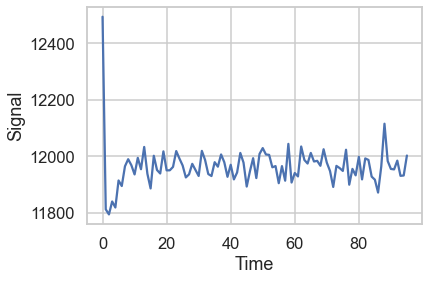

In [195]:
_ = plt.plot(fmri[8,8,8,:])
plt.xlabel("Time")
plt.ylabel("Signal")

The signal you are observing shows how the activity of a specific voxel changes throughout time. However, it is not only that. Indeed, fMRI is highly affected by noise. Noise can be introduced due to multiple reasons, such as motion. The head movement, as well as the simple movement caused by the heart beating, introduce noise in the fMRI signal. Correcting for this noise is important when you do some analysis!

It is possible to plot the timecourse of different voxels in one plot, by simply writing multiple plot commands one after the other.

Text(0, 0.5, 'Signal')

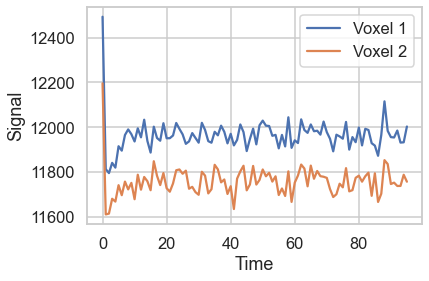

In [196]:
_ = plt.plot(fmri[8,8,8,:], label = "Voxel 1")
_ = plt.plot(fmri[8,9,8,:], label = "Voxel 2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Signal")

-------
### Code here

Now let's try to combine what you learnt before. Create a figure that represents how an axial view of the brain changes throughout time.

Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

In [197]:
## Code here


------

## Functional connectivity analysis

Apart from plotting the timecourses, you can also plot a scatterplot to observe whether the timecourse of two voxels is correlated. This is important because if the signal of two voxels is correlated, it might mean that the brain acitivity of one of the regions depends one the activity of the other region.

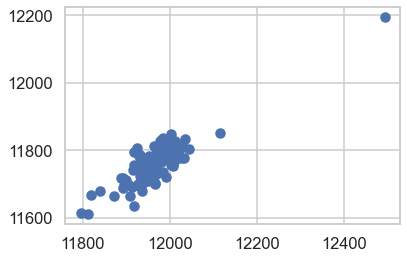

In [198]:
_ = plt.scatter(fmri[8,8,8,:], fmri[8,9,8,:])

**Functional connectivity** describes how the timecourse of two brain regions statistically depend on each other. To measure this statistical dependency, we can calculate the correlation between the timecourses of two separate voxels. Let's try to select two voxels and calculate their correlation.

In [199]:
voxel1 = fmri[13,8,9,:]
voxel2 = fmri[10,3,9,:]

In [200]:
np.corrcoef(voxel1, voxel2)

array([[1.        , 0.63143795],
       [0.63143795, 1.        ]])

The output of the function is the correlation coefficient **R**. Since the ouput is a diagonal matrix, to extract the correlation coefficient, you can extract the second element of the first array, or the first element of the second array.

In [201]:
np.corrcoef(voxel1, voxel2)[0][1]

0.6314379526141777

 As you should already know, the correlation coefficient can have any value between -1 and 1. The closer is the value to -1 or 1, the more linear is the relationship between the two timecourses. The greater is the absolute value, the stronger is the relationship. A positive coefficient indicates that when the signal of one voxel increases, the signal of the other voxels also tends to increase. Instead, a negative coefficient means that when the signal of one voxel increases, the signal of the other voxel tends to decrease. In this case, there is a moderate, positive, correlation between the two selected voxels, which means that the two voxels appear to have similar timecourses.

However, to be able to interpret what this actually means, it is important to understand where the voxels are located in the brain. It is possible to do this by simply creating a copy of your original fmri image and replacing the value of the voxel of interest with a 0. In this way, you will be easily able to see where the voxel is when you create a plot, because the voxel will be completely black.

**IMPORTANT**: you must create a copy of the image, or you will lose the real signal information of the voxel you are studying. You should use the copy ONLY for visualization purposes and not for the analysis.

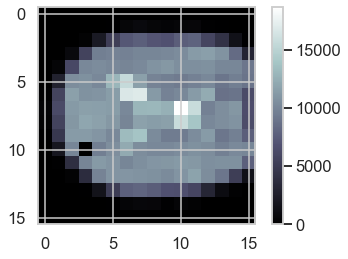

In [202]:
fmriview = fmri.copy()
fmriview[10,3,9,1] = 0
plt.imshow(fmriview[:, :, 9, 1], cmap = "bone")
plt.colorbar()

As you can see the voxel is more or less located in the occipital cortex. As a reference, you can use the following (or any other) figure.

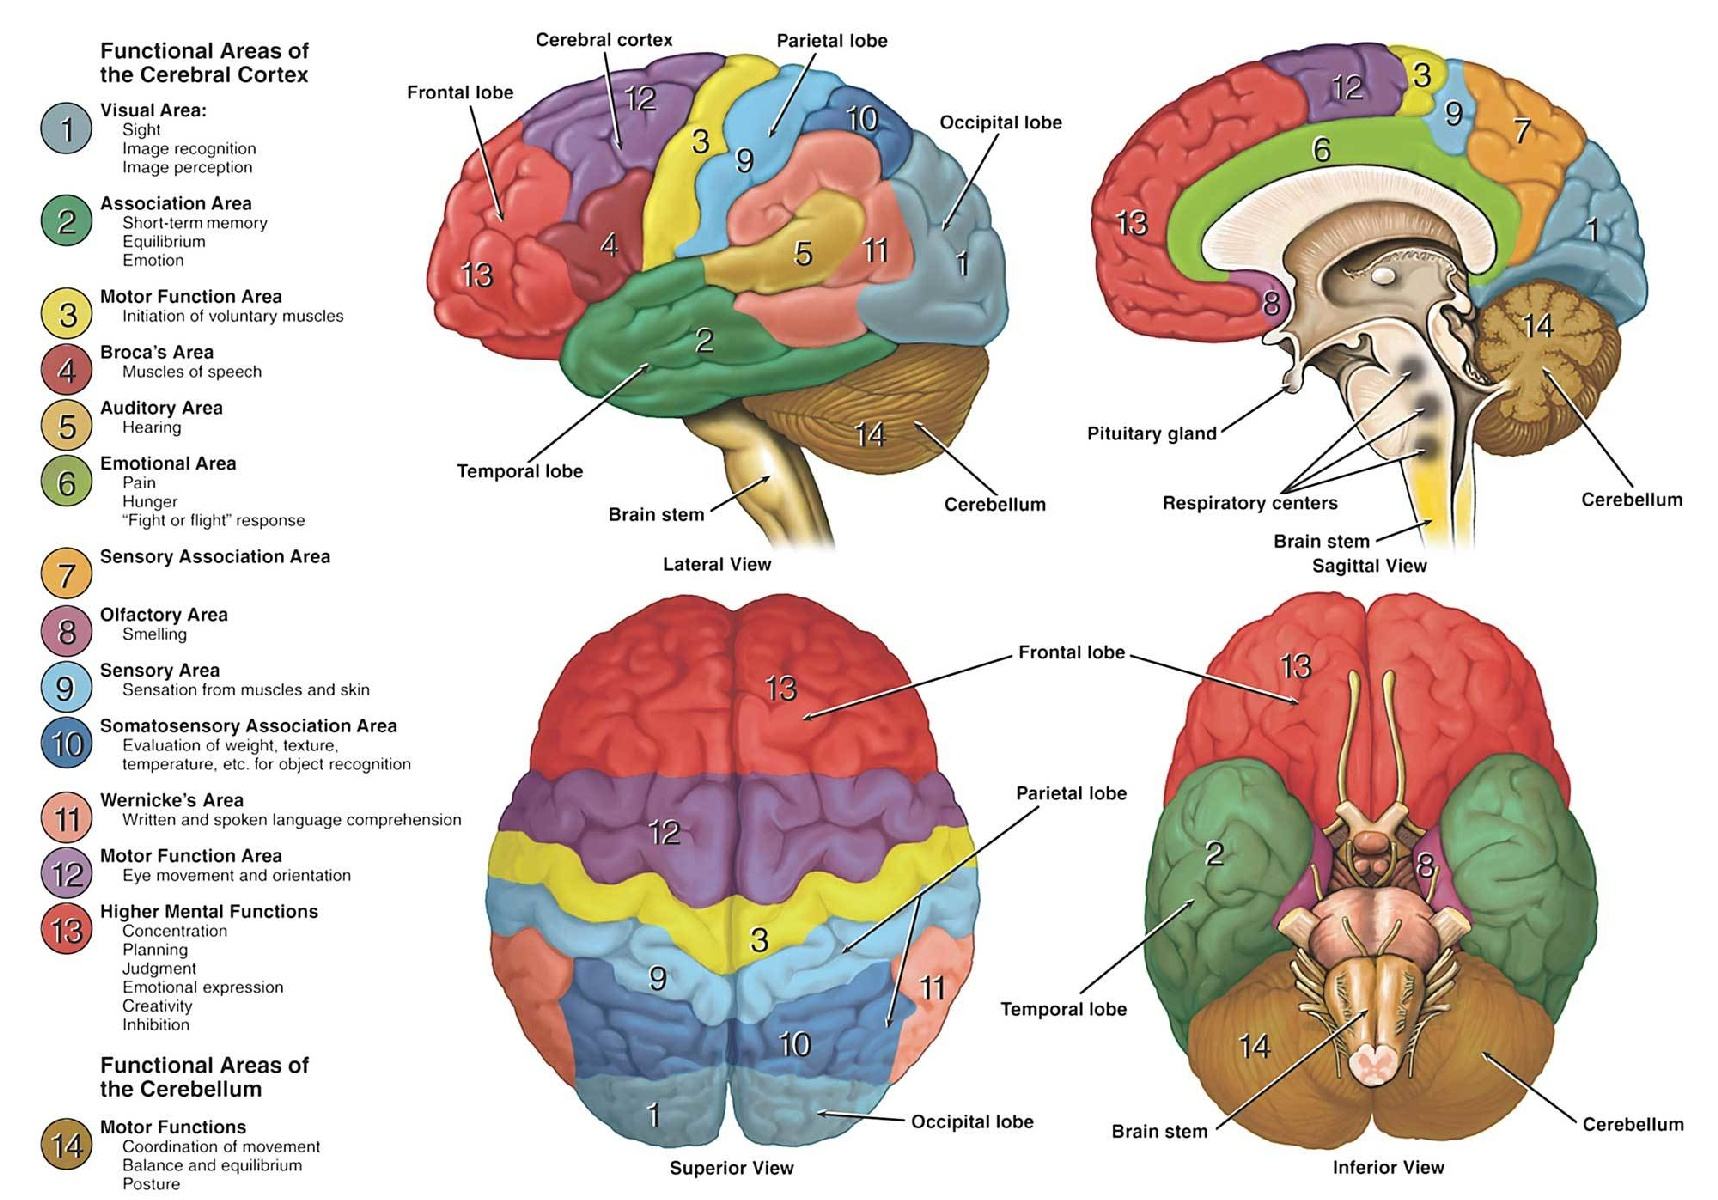

------
## Code here

Select a couple of voxels located in different regions of the brain and calculate the correlation coefficient. How does it change?

In [180]:
## Code here

--------

The problem with the above approach is that you need to manually select each voxel and then run the correlation analysis. A quicker method is to run a whole brain functional connectivity analysis, which essentially takes one voxel, called **seed** voxel and calculates the correlation between the seed and all the other voxels in the brain. 

To be able to do this, it is necessary to use three `For Loops`, which you should have learnt as part of the primer material. The reason why we need three `For Loops` is that we need to loop over all possible combinations of x, y and z coordinates. More in detail, we need to complete the following steps:

1. Create an all zero array with the same (x, y, z) shape of the fMRI data. We will use this array as a placeholder, and will replace the (x,y,z) value of the array with the correlation coefficient between the seed voxel and the voxel located in (x,y,z)
2. Identify the seed voxel (we will use here the voxel located in the visual cortex)
3. Loop over all x, y and z possible coordinates
4. Calculate the correlation between the (x,y,z) voxel and the seed voxel
5. Replace the 0 value of the all zero array with the correlation coefficient

In [181]:
fmri.shape[0:3]

(16, 16, 16)

In [203]:
seed_voxel = fmri[10,3,9,:]
FunctionalConnectivityResults = np.zeros(fmri.shape[0:3])
for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            new_voxel = fmri[x,y,z,:]
            corr_voxels = np.corrcoef(seed_voxel, new_voxel)[0][1]
            FunctionalConnectivityResults[x,y,z] = corr_voxels

Now, **FunctionalConnectivityResults** contains all the correlation coefficients between the seed voxels and the other voxels. To visualize them you can print them or plot them.

In [204]:
FunctionalConnectivityResults[2,10, 9]

0.6188145074545617

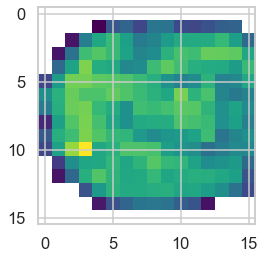

In [206]:
plt.imshow(FunctionalConnectivityResults[:,:, 9], cmap = "viridis")

Try to check the correlation coefficient value in the seed voxel coordinates. Why do you think it is like that?

Now try to check the value at x=1, y=1, z=1

In [207]:
# CODE HERE


If you did it correctly, you should see that the value is **nan**. This nan corresponds to the white regions in the above figure, and to the areas in the image that are outside the brain (e.g. the background). We don't really need to calculate the correlation between the background and the seed voxel, because it just increases the amount of calculation that need to be computed, and the time required to compute them. This is a big waste of computational resources, mainly when running more complex analysis, rather than a simple correlation. 

In order to avoid running calculations that are not needed, we can use the information contained in the *brain mask*. The brain mask is a separate image that specifies which part of the fMRI images belong to the brain, and which parts to the background. To do that, it assigns a value of 1 to the brain regions, and a value of 0 to the background regions. Let's import the brain mask to see how it looks.

In [209]:
with open('Data/brainmask.pickle', 'rb') as handle:
    mask = pickle.load(handle)

In [210]:
mask.shape

(16, 16, 16)

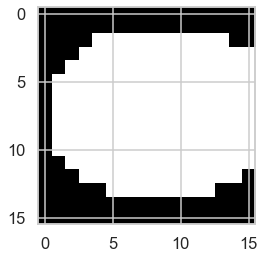

In [211]:
plt.imshow(mask[:, :, 9], cmap = "bone")

As you can see the (x, y, z) shape of the mask is equivalent to the (x, y, z) shape of the fMRI image. If you plot it, you can see in white the parts that belong to the brain, and in black those that belong to the background. In order to use the information contained in this mask, we can ass an additional if statement that specifies that the correlation should be computed **ONLY** if the (x,y,z) value in the mask is equal to 1.

In [212]:
seed_voxel = fmri[10,3,9,:]
FunctionalConnectivityResults = np.zeros(fmri.shape[0:3]) # Create a variable full of zeros, which will later be replaced by the correlations coefficients we obtain between voxels
for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            if mask[x, y, z] == 1:
                new_voxel = fmri[x,y,z,:]
                corr_voxels = np.corrcoef(seed_voxel, new_voxel)[0][1] #Run a correlation between the seed voxel and another voxel in the brain
                FunctionalConnectivityResults[x,y,z] = corr_voxels #Replace the zeros with the correlation values

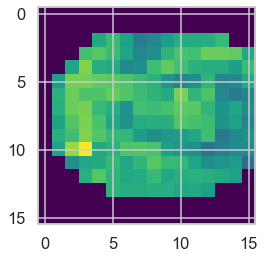

In [213]:
plt.imshow(FunctionalConnectivityResults[:,:, 9], cmap = "viridis")

In [217]:
FunctionalConnectivityResults[1,1, 1]

0.0

Now, as you can see, the value in the background regions is equal to 0, which means that the original 0 value was not updated, since no correlation was computed.

## Whole brain regression analysis

A more advanced alternative to whole brain functional connectivity analysis is **whole brain regression analysis**. As you should already know, regression analysis consists of trying to predict a variable Y based on one or more variables X (called regressors). The strength of regression analysis compared to simple correlation is that it allows you to have more than one X, which means that it is possible to account for other factors when studying the association (such as cofounding factors). We will understand thoughout the lecture why this is important. For now, let's start by running the whole brain regression analysis only using the timecourses of two voxels.

The code will remain pretty much the same as the one for the functional connecitivity analysis, with the difference that now instead of running the correlation, we will run a regression and store three different outputs: the p values, t statistic and beta coefficients. The reason why we add a [1] when extracting the p values, t stats and beta coefficients is that we want to get the values that correspond to the timecourse of the other voxel and not of the intercept (or constant term) (which is at index 0).

The constant term accounts for the fluctuations in the signal that are not predicted by the timecourse of the voxel X. 

In [15]:
import statsmodels.api as sm

In [215]:
seed_voxel = fmri[10,4,9,:]

RegressionPvalues = np.zeros(fmri.shape[0:3])
RegressionTstats = np.zeros(fmri.shape[0:3])
RegressionBeta = np.zeros(fmri.shape[0:3])

for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            if mask[x, y, z] == 1:
                new_voxel = fmri[x,y,z,:]
                mod = sm.OLS(new_voxel, sm.add_constant(seed_voxel), hasconst=True).fit() #Run the regression model between the two voxels
                RegressionTstats[x,y,z] = mod.tvalues[1] #save the t-value of the independent value (e.g. the voxel timecourse)
                RegressionPvalues[x,y,z] = mod.pvalues[1] #save the p-value of the independent value
                RegressionBeta[x,y,z] = mod.params[1] #save beta coef of the independent value 

Let's look at all the results. Before plotting the images, we set as nan the values in the seed voxel location, because they represent the results of the regression of the seed voxel with itself.

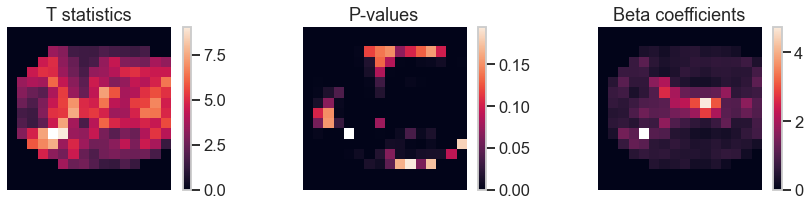

In [216]:
RegressionTstats[10,4,9] = np.nan
RegressionPvalues[10,4,9] = np.nan
RegressionBeta[10,4,9] = np.nan

plt.figure(figsize = (15,3))
plt.subplot(131)
plt.imshow(RegressionTstats[:,:, 9])
plt.title("T statistics")
plt.axis("off")
plt.colorbar()
plt.subplot(132)
plt.imshow(RegressionPvalues[:,:, 9])
plt.title("P-values")
plt.axis("off")
plt.colorbar()
plt.subplot(133)
plt.imshow(RegressionBeta[:,:, 9])
plt.title("Beta coefficients")
plt.axis("off")
plt.colorbar()

Try to pick another seed voxel and see how the results change.

Now that we know how to run some basic regression analysis with fMRI data, we can make a step forward and try to add multiple variables as regressors apart from the voxel timecourse. As mentioned earlier, one of the strength of regression analysis is that it allows to covary out signals that might be random noise or artefact (since it can take more than one X), such as those that are caused by head motion. Head motion is one of the biggest sources of noise in fMRI data, and one approach to account for it is to add it as a regressor when running the linear regression model. In this way, it is possible to calculate the statistical relationship between voxel timecourses that is not the result of the motion timecourse. 

Let's import the head motion timecourse and check the shape.

In [218]:
with open('Data/motion_day4.pickle', 'rb') as handle:
    motion = pickle.load(handle)

In [219]:
motion.shape, motion[1:10]

((96, 1),
 array([[0.09384  ],
        [0.0309833],
        [0.0702182],
        [0.0781624],
        [0.0523351],
        [0.0551896],
        [0.0523202],
        [0.0294705],
        [0.0248516]]))

As you can see, the motion timecourse provides a measure of head movement for each timepoint of fMRI image collection. The weird thing is that the array, although it should be 1 dimensional, it appears to have 2 dimensions. To fix this, we can use the methos squeeze().

In [220]:
motion = motion.squeeze()
motion.shape

(96,)

Now we can use it in the whole brain regression analysis. 

In [221]:
seed_voxel = fmri[10,4,9,:]

RegressionPvaluesMotion = np.zeros(fmri.shape[0:3])
RegressionTstatsMotion = np.zeros(fmri.shape[0:3])
RegressionBetaMotion = np.zeros(fmri.shape[0:3])

for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            if mask[x, y, z] == 1:
                new_voxel = fmri[x,y,z,:]
                X = pd.DataFrame({"Voxel": seed_voxel, "Motion": motion}) # Set X as your independent variables, i.e. the voxel timecourse and the motion timecourse
                mod = sm.OLS(new_voxel, sm.add_constant(X.values), hasconst=True).fit() # Run the regression model
                
                RegressionTstatsMotion[x,y,z] = mod.tvalues[1] # Save the t-value 
                RegressionPvaluesMotion[x,y,z] = mod.pvalues[1] # Save the p-value
                RegressionBetaMotion[x,y,z] = mod.params[1] # Save the beta coef

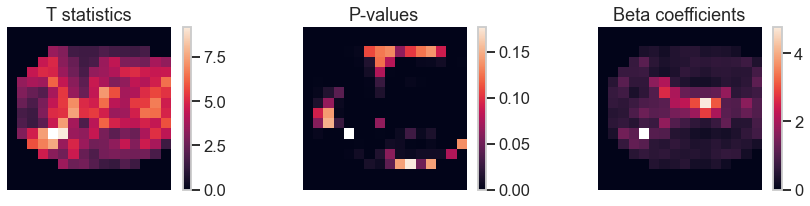

In [223]:
RegressionTstatsMotion[10,4,9] = np.nan
RegressionPvaluesMotion[10,4,9] = np.nan
RegressionBetaMotion[10,4,9] = np.nan

plt.figure(figsize = (15,3))
plt.subplot(131)
plt.imshow(RegressionTstatsMotion[:,:, 9])
plt.title("T statistics")
plt.axis("off")
plt.colorbar()
plt.subplot(132)
plt.imshow(RegressionPvaluesMotion[:,:, 9])
plt.title("P-values")
plt.axis("off")
plt.colorbar()
plt.subplot(133)
plt.imshow(RegressionBetaMotion[:,:, 9])
plt.title("Beta coefficients")
plt.axis("off")
plt.colorbar()

By looking at the results, it is not easy to see any difference, which suggests that motion is not playing a big role. However, if you check the values individually, you will see that the value changed, even if only slightly. 

In [224]:
print("Before:", RegressionTstats[8, 6, 9])
print("After:", RegressionTstatsMotion[8, 6, 9])

Before: 7.525081589352711
After: 7.483849706779528


---------
## Code here

Repeat the whole brain regression analysis, but this time:
1. Plot the beta coefficient, t statistics and p values plots for the head motion rather than the voxel timecourse. This will allow you to see whether and to which extent the head motion plays a role.
2. We are not limited to covarying out the effect of motion, but also could remove other non-neural noise sources. For example it is common to remove timecourses taken from white matter and cerebrospinal fluid (where neural signal cannot originate) as well as motion. Try to rerun the regression analysis, but this time add as additional regressor the timecourse of a voxel located in the white matter or cerebrospinal fluid. Use the following image as a reference to locate the right voxels.
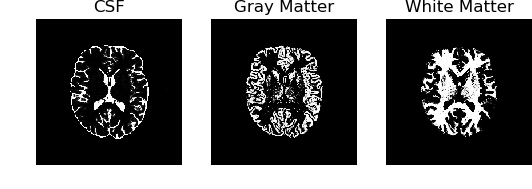


In [265]:
# Code here


--------

## Task activation analysis

Until now, we tried to predict the timecourse of a seed voxel using the timecourse of the other brain voxels, after accounting for head motions or other factors. However, when you do a task fMRI, what you really want to understand is which brain regions are activated while the participant is completing the task. In this case, the task was characterised by a block design, which means that the participants had a block of time in which they were doing a task, followed by a block of time in which they were at rest. If a voxel is activated as a result of the task, we would expect the signal of that voxel to be higher during the task block and be lower during the rest block.

A way to measure this is to run whole brain regression analysis, but this time the task timecourse, which specifies when exactly the rest and task occured,  will be used to predict the voxel timecourse. In this way, it will be possible to understand how much of the voxel timecourse can be explained by the task timecourse. Let's import the task timecourse and check it out.

In [23]:
with open('Data/tasktc_day4.pickle', 'rb') as handle:
    task_tc = pickle.load(handle)

([], [])

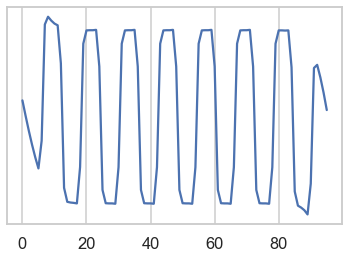

In [24]:
plt.plot(task_tc)
plt.yticks([])

As you can see from the plot, the times where the peaks are located correpond to the task block, instead those where the minima are located correspond to the rest block. If a voxel was active only during the task, and not at rest, we would expect to see a similar pattern when looking at the voxel signal. Of course this is just one task design,  but many others are possible. For example, if you were showing two types of stimuli at the same time and would like to understand the brain activation for each one of them, then you would have to add two separate regressors, or X, in your model.

 One regressor that describes when the first stimulus occurred, and one regressor that describes when the second stimulus occurred. After fitting the model, you would get beta coefficients, t-stats and p-values for each one of those regressors, which would give you information about the brain activation during each one of the stimuli. 

------
## Code here

Modify the code above to run whole brain regression analysis, but this time using as X the task timecourse AND the motion, and as Y the voxel timecourse. Call the results RegressionTstatsTask, RegressionPvaluesTask and RegressionBetaTask

**Tips**: Check the shape of task_tc. Is it a 1D array as it should? If not, don't forget to address that!

In [300]:
# Code here

--------

Once you completed the above exercise, try to visualise the results.

In [ ]:
plt.figure(figsize = (15,3))
plt.subplot(131)
plt.imshow(RegressionTstatsTask[:,:, 9])
plt.title("T statistics")
plt.axis("off")
plt.colorbar()
plt.subplot(132)
plt.imshow(RegressionPvaluesTask[:,:, 9])
plt.title("P-values")
plt.axis("off")
plt.colorbar()
plt.subplot(133)
plt.imshow(RegressionBetaTask[:,:, 9])
plt.title("Beta coefficients")
plt.axis("off")
plt.colorbar()

As you can see, the t-statistics is a bit noisy because it includes also the values of the non-significant voxels. To improve this, we can savethe t-statistics **only** if the p-value is below a chosen threshold, such as 0.05.

-------
## Code here

Modify the code above to run whole brain regression analysis, but this time using as X the task timecourse AND the motion, and as Y the voxel timecourse. Call the results RegressionTstatsTask, RegressionPvaluesTask and RegressionBetaTask. Add an if statement, according to which the t statistics is saved in *RegressionTstatsTask* only if the p-value is below 0.05.

**Tips**: Check the shape of task_tc. Is it a 1D array as it should? If not, don't forget to address that!

In [307]:
## Code here


-------

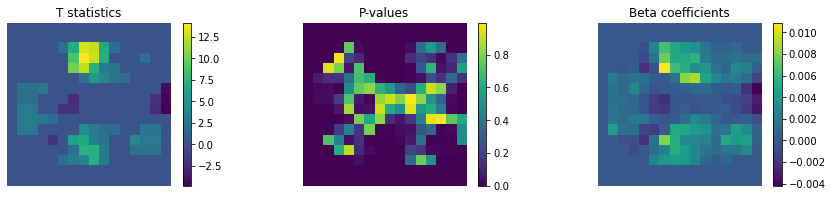

In [305]:
plt.figure(figsize = (15,3))
plt.subplot(131)
plt.imshow(RegressionTstatsTask[:,:, 9])
plt.title("T statistics")
plt.axis("off")
plt.colorbar()
plt.subplot(132)
plt.imshow(RegressionPvaluesTask[:,:, 9])
plt.title("P-values")
plt.axis("off")
plt.colorbar()
plt.subplot(133)
plt.imshow(RegressionBetaTask[:,:, 9])
plt.title("Beta coefficients")
plt.axis("off")
plt.colorbar()

Now the results appear much cleaner. Based on the results, can you understand which task the participants were completed? Use the image above to try to understand which brain regions are activated.


## Analysis of functional network abnormalities in clinical populations

At this point of the workshop, you should have a good overview on fMRI and sMRI data. Until now, we analysed individual images. We will now try to infer some results at the population level. The analysis of the images of each individual subject is called **first level analysis**, and it involves the whole brain regression analysis we studied in the first part of the workshop. Once you completed the first level analysis, you can move on to the **second level analysis** which is a group analysis.

In this part of the workshop, we will run a second level analysis and, in more detail, we will analyse data from a study of Parkinson's disease patients. In addition to the primary motor symptoms, Parkinson’s patients have a higher likelihood of developing dementia. A number of genetic factors have been linked to this risk, one of them being MAPT genotype, which relates to the microtubule assembly protein Tau. To test whether MAPT has a relationship with memory impairments in PD, we will examine activation levels in the medial temporal lobes, which are central to memory function, while the patients and controls perform a memory encoding task. The original analysis was published [here](https://www.sciencedirect.com/science/article/pii/S0197458014007982).

The participants were presented with a series of abstract art pictures whilst in the MRI scanner. They were asked to commit them to memory. When they left the scanner, they were tested on their ability to recognise the pictures that they had been presented with. Also in this case, the task had a block design (fixation vs task stimulus).

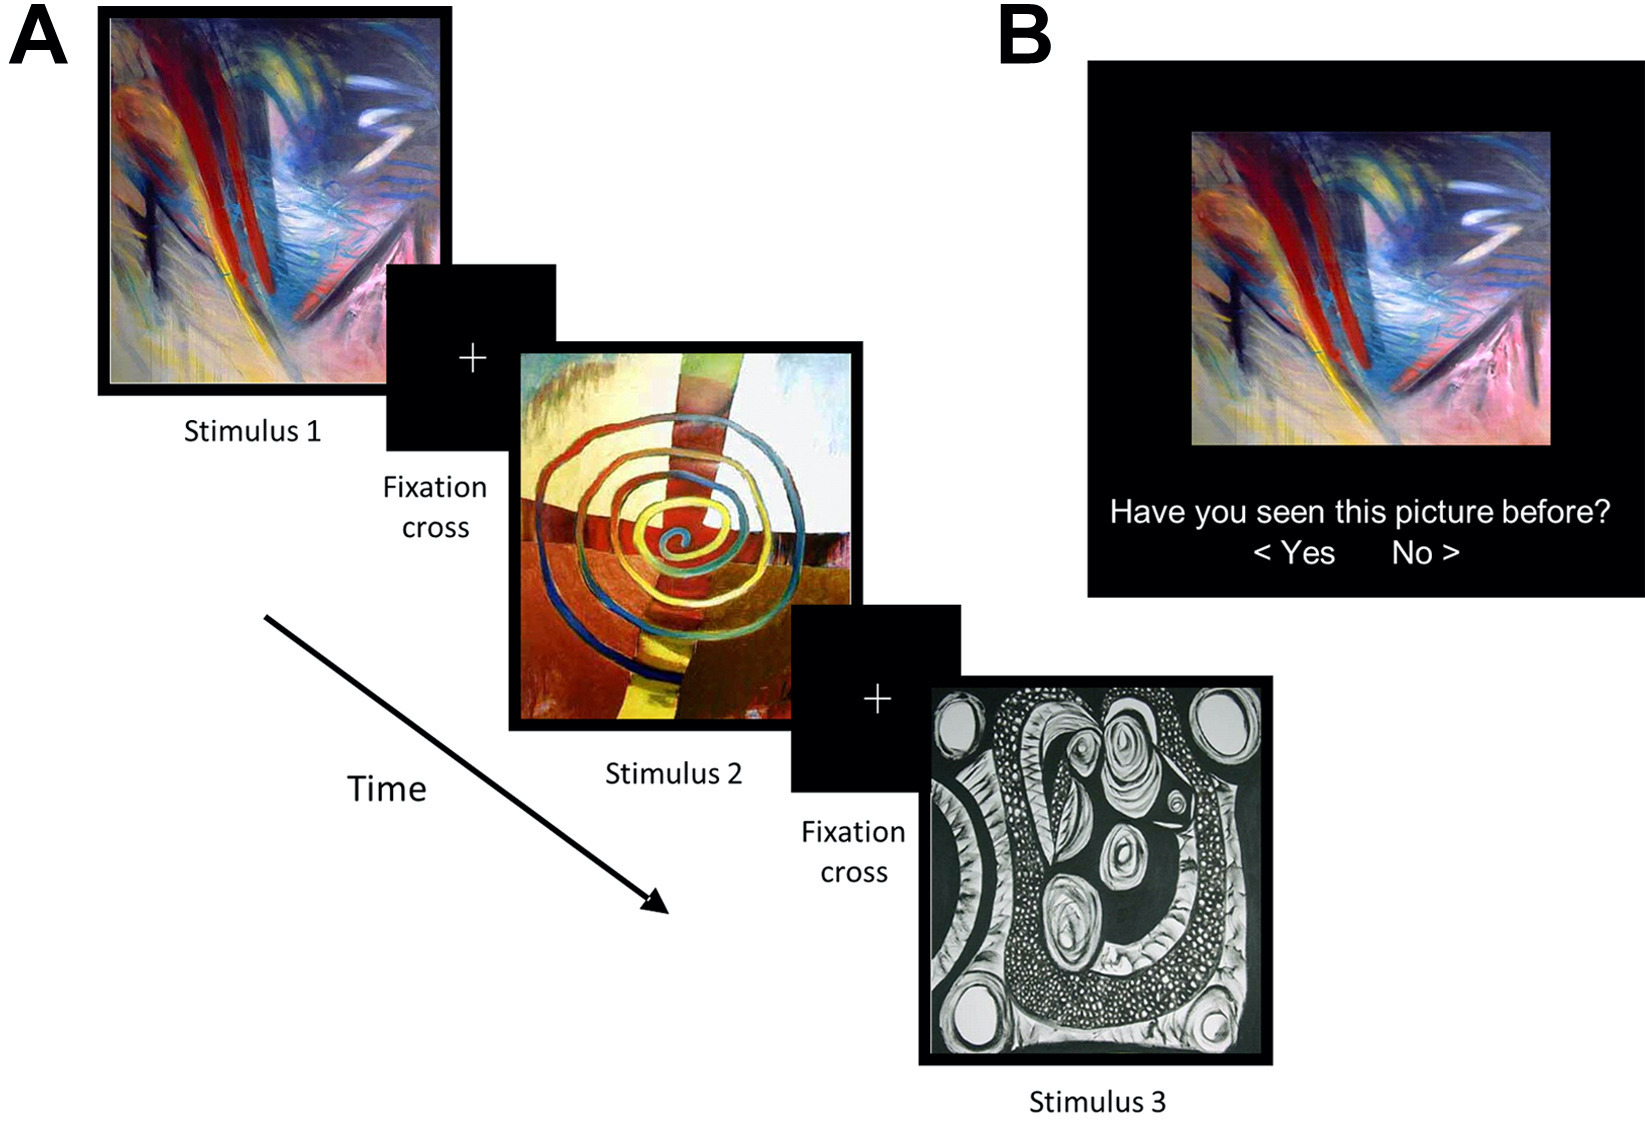

By using as regressors the presentation of stimuli that are succesfully and not succesfully recalled, it is possible to obtain measures of brain activation during recalled and not recalled stimuli. It is then possible to compare the brain activation between recalled vs not recalled to evaluate what are the differences. More details on how this is concretely achieved will be provided later on in the year, in Module 6, if you decide to go for the Computational stream. The important information is that a difference in the activation in the **medial temporal lobes** is commonly observed, and this is why we will focus the analysis on this region of interest and we will study cross-group differences in this ROI.

The H2 allele is rarer than the H1 allele; therefore, few individuals are homozygous for H2. However, it is believed that one copy of the H2 allele helps counter the dementia risk. Therefore, our hypothesis is that when committing pictures to memory, the H2 carriers will show more activation in medial temporal lobe structures that support memory functions than the H1 homozygotes.

Furthermore, we hypothesise that there could be a more pronounced effect of MAPT in the patients than the controls.

To test these predicitons, fMRI data were collected from 40 controls and 37 PD patients while they performed the memory task. 21 of the controls were homozygous for the H1 MAPT genotype and 19 had one or more H2 alleles. 19 patients were H1 homozygotes and the remaining 18 had one or more H2 alleles.

Activation during successful vs unsuccessful memory encoding was calculated for each voxel in the brain at the individual subject level using a generalised linear regression model (more information on how to do this will be provided in M6). The resultant whole brain maps depicting the final beta coefficients obtained after comparing the recalled vs not recalled stimuli are in the folder *02_MAPT_PD* inside the *Data* directory. Inside the folder you will find 4 separate directories: 
1. *CONTROL_H1*: whole brain beta coefficients maps for control patients with the H1 allele
2. *CONTROL_H2*: whole brain beta coefficients maps for control patients with the H2 allele
3. *PD_H1*: whole brain beta coefficients maps for Parkinson's patients with the H1 allele
4. *PD_H2*: whole brain beta coefficients maps for Parkinson's patients with the H2 allele

In addition you will have two additional images that correspond to a standard MNI brain template (*MNI152_T1_1mm*) and a mask for the medial temporal lobes (*Hippocampus_Mask*). The former corresponds to a brain image obtained by averaging out brains from multiple healthy controls. It is used as a standard representation of how a healthy brain should look like. Instead, the latter is a mask that specifies where in the brain the medial temporal lobe is located. It is similar to the brain mask we used at the beginning of the workshop to identify which parts of the image belong to the background and which to the brain, but this time the part that is highlighted is only the medial temporal lobe. 

All the brain images are saved in `nifti` format, which is a typical file format for neuroimaging. In order to work with `nifti` images in python, it is necessary to download and import a new module, called `nibabel`. 


In [ ]:
pip install nibabel

In [28]:
import nibabel as nib

Let's start by importing the standard template and the mask, and let's check them out. In this way, it will be easier to understand what they are. We convert the images to array because in Python it is easier to work with arrays comapred to images.

In [29]:
template = nib.load("Data/02_MAPT_PD/MNI152_T1_1mm.nii")
mask = nib.load("Data/02_MAPT_PD/Hippocampus_Mask.nii")

template_arr = np.array(template.dataobj)
mask_arr = np.array(mask.dataobj)

mask_arr.shape, template_arr.shape

((79, 95, 68), (79, 95, 68))

Text(0.5, 1.0, 'Brain template')

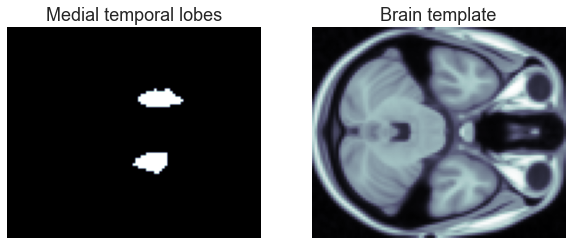

In [30]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.imshow(mask_arr[:, :, 9], cmap = "bone")
plt.axis("off")
plt.title("Medial temporal lobes")
plt.subplot(122)
plt.imshow(template_arr[:, :, 9], cmap = "bone")
plt.axis("off")
plt.title("Brain template")

A better way to visualize where the medial temporal love are located is to overlay the mask on top of the template. To overlay it, we can just set as 0 all the regions in the template image where the mask has a value bigger than 0 (e.g. the medial temporal lobes).

Text(0.5, 1.0, 'Coronal Plane')

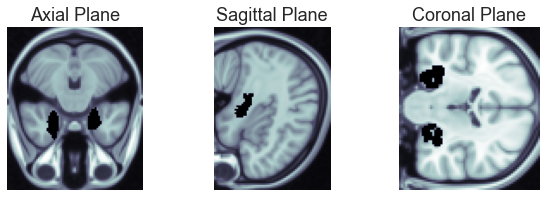

In [28]:
template_arr[mask_arr>0] = 0


plt.figure(figsize = (10, 3))
plt.subplot(131)
plt.imshow(template_arr[:, :, 9].T, cmap = "bone")
plt.axis("off")
plt.title("Axial Plane")
plt.subplot(132)
plt.imshow(template_arr[20, :, :], cmap = "bone")
plt.axis("off")
plt.title("Sagittal Plane")
plt.subplot(133)
plt.imshow(template_arr[:, 45, :], cmap = "bone")
plt.axis("off")
plt.title("Coronal Plane")

Now it's easier to visualize the medial temporal lobes along the three planes. Try to change the values in the x, y and z coordinates, you will see that the black shaded area will change in size and shape.

Now we want to import all the data for the different patients' and controls' groups. We will start by reading through all the *CONTROL_H1* files and import the beta weights images as array. In Python, there is a really nice and easy to use function called `listdir` (within the `os` module, which is already installed once you download Python) that can extract all the file names within a specific directory in a list format. In this way, it is easy to loop over the list of file names and import all the images at once.

In [31]:
path_directory = "Data/02_MAPT_PD/CONTROL_H1//"
control_h1_dir = os.listdir(path_directory)

control_h1_all = []
for file in control_h1_dir:
    loaded_img = nib.load(path_directory+file)
    imgfile = np.array(loaded_img.dataobj)
    control_h1_all.append(imgfile)

len(control_h1_all), control_h1_all[0].shape

(21, (79, 95, 68))

We now created a list where each element of the list is a brain activation map of a subject. Since we have 21 H1 controls, the list has 21 elements of shape (79, 95, 68). However, in Python, it is generally easier to work with arrays rather than list and this is why we will convert the list to an array.

In [32]:
control_h1_all = np.array(control_h1_all)
control_h1_all.shape

(21, 79, 95, 68)

As you can see, *control_h1_all* is now a 4D array of shape (21, 79, 95, 68). The first dimension of the array corresponds to the different subjects, instead the remaining dimensions are the normal dimensions of a brain image. This array is easier to work with because we can simply access the brain activation maps of each individual subject by filtering the first dimension of the array. Let's look at one example for the first subject at index 0 in dimension 1.

(-0.5, 94.5, 78.5, -0.5)

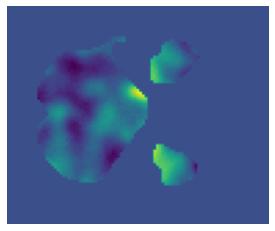

In [33]:
plt.imshow(control_h1_all[0, :, :, 9], cmap = "viridis")
plt.axis("off")

Great! Now that we have the brain activation maps for all subjects in one place, we can start doing some analysis. One of our main aims is to study the difference in activation within the medial temporal lobes across the different groups (Control H1, Control H2, Parkinson's H1 and Parkinson's H2). To be able to make that comparison, we need to calculate what is the mean activation across all subjects within each group in the ROI.

To do this, we need to complete a few steps:
1. Calculate the number of voxels that belong to the medial temporal lobes
2. Sum the beta coefficients values whithin the medial temporal lobes region
3. Calculate the average value by dividing the obtained sum for the number of voxels

In [35]:
nvoxelsinmask = np.nansum(mask_arr)
nvoxelsinmask

3988.0

By doing the `nansum`, we calculate the sum of the voxels across all dimensions. Now we can loop over all the subjects, extract each subject using the first dimension of the 4D array, multiply the brain mask for the array mask (since the mask has value 1 in the ROI and 0 in the other regions, we can filter the beta coefficients for the ROI), and obtain an average measure.

In [36]:
C_H1 = []

for n_subj in range(control_h1_all.shape[0]):
    
    # Extract each subject by using the first dimension of the array
    currentsubject = control_h1_all[n_subj,:,:, :]
    currentsubject = currentsubject * mask_arr
    mean_beta = np.nansum(currentsubject) /nvoxelsinmask
    C_H1.append(mean_beta)
print(C_H1)

[0.36272636, 0.08698163, 0.064414784, 0.5144385, 0.1459888, -0.3301602, 0.02844563, -0.42138183, -0.31603032, -1.0293784, -0.14496599, 0.058579784, 0.09201167, -0.2514752, 0.3129767, 0.037248563, 0.123540126, -0.10064192, -0.013825955, -0.4631708, -0.18568432]


-------
### Code here

We have now calculated average brain activation in the ROI for the *CONTROL_H1* group. Repeat the same steps of the analysis for the *CONTROL_H2*, *PD_H1*, and *PD_H2* group. Save the results in three lists called respectively C_H2, P_H1, and P_H2. Since the code is quite repetitive, you could try to extract it in a function to avoid having to copy and paste the same thing multiple times.


In [478]:
# Code here

---------

Once you have completed the above exercise, you can move on with the next steps of the workshop. Let's look at the distributions of the obtained data.

In [ ]:
_ = plt.boxplot([C_H1, C_H2, P_H1, P_H2], labels = ["Control_H1", "Control_H2", "Parkinson_H1", "Parkinson_H2"])
_ = plt.title('Data distributions for the four groups')
_ = plt.xticks(rotation=45)

Simply by looking at the plot, you can notice two things: 1) the H2 carriers may be activating their medial temporal lobes more strongly than the H1 homozygotes, 2) The data have some outliers. To address the second point, we can winsorize the data as we learnt in the previous workshops.

-------
### Code here

Winsorize the data using the `winsorize` function from `scipy.stats.mstats`, and winsorise the data above the 95% and below the 5% percentile. Once you did that, plot the boxplot again and check whether the winsorization was successfull. Call the winsorized values *C_H1_W*, *C_H2_W*, *P_H1_W*, and *P_H2_W*. Do you still see outliers in the boxplot? If yes, why do you think it is the case? Are those really outliers?

In [546]:
# Code here


---------

Now that we cleaned the data, let's check whether they are normally distributed before running any type of analysis.

In [562]:
winsorized_data = [C_H1_W, C_H2_W, P_H1_W, P_H2_W]

for i, data in enumerate(winsorized_data):
    shapiro_pvalue = shapiro(data).pvalue
    if shapiro_pvalue < 0.01:
        print("Distribution of group", i, "is significantly different from a normal distribution")

Distribution of group 1 is significantly different from a normal distribution
Distribution of group 2 is significantly different from a normal distribution


As you can see, at least 2 groups are not normally distributed. This means that it is impossible to use **parametric** tests, which have as requirement that the data must be normally distributed. An alternative to parametric tests is **non parametric** tests, such as **permutation** analysis. Permutation works as follows. Let's say we have two groups, such as C_H1 and C_H2. We first calculate the observed difference between the mean activations in the two groups. We then randomly interchange the data between the two groups N times, and measure the mean difference between the permuted groups each time. From this, we can infer what the probability is of observing the difference in the non-permuted data due to chance alone, that is, without making any assumptions regarding the distribution of the observed data. If that probability is low, then we reject the null hypothesis that the groups are the same.

A funny, and easy to understand visualization of permutation testing can be find at this [link](https://www.jwilber.me/permutationtest/).

Let's define a function for permutation testing, that calculated the p-value and plots the random distribution together with the actual observed mean difference.

In [38]:
import random

def permutation(g1, g2, N):
    dists = []
    diff = np.abs(np.nanmean(g1) - np.nanmean(g2)) # Calculate the difference between means 
    n_g1 = len(g1) # Calculate the number of observations in group 1
    n_g2 = len(g2)
    for perm in range(N):
        merged_groups = g1 + g2 # Add group 1 and group 2 together in a long vector (or column)
        random.shuffle(merged_groups) # Randomly shuffle the values in the column
        g1_r = merged_groups[0:n_g1] # Split back the values from the long vector into the two groups we had initially. The main difference now is that their values are shuffled.
        g2_r = merged_groups[n_g1:n_g1+n_g2]
        dist = np.abs(np.nanmean(g1_r) - np.nanmean(g2_r)) # Calculate the difference in means between these two shuffled groups 
        dists.append(dist) #Add the results of the difference to a variable. This process gets repeated many times (i.e. N times) until you create a distribution of these shuffled mean differences.
    p_value = np.nansum(diff < dists) / N # Compare the un-shuffled mean difference with the distribution of shuffled mean differences to estimate whether there is a mean difference between the unshuffled groups
    plt.hist(dists) #Plot these differences
    plt.axvline(x = diff, c = "red")
    return p_value


One of our predictions is that the MAPT genotype affects medial temporal lobe function in controls. We can address this using our function by determining the probability of observing a difference between the H2 and H1 groups of the scale that was actually observed but when the data are randomly shuffled between the two groups. 

In [ ]:
permutation(C_H1_W, C_H2_W, 10000)

Here the answer is significant at the P<0.001 one-tailed threshold in the direction predicted by our hypothesis. Try to rerun the function. Do the results change? Why do you think that's the case?

Repeat the same analysis, but this time compare the Parkinsons' patients. 

Nevertheless, we are not only interested in checking whether the MAPT genotype has an effect, but we would like to study whether the effect is different for healthy controls or Parkinson's patients, which means checking whether there is an interaction effect between the MAPT genotype and the disease status. Thus, we want to run a regression analysis, with an interaction effect (similarly to what we did on Day 3) and then apply a permutation analysis to this, to estimate the p-values of this regression. This approach is also known as a 2x2 permutation analysis.

The idea relates to the definition of a p-value: what's the chance to observe this effect (the coefficient of my model) by random chance alone?
We will calculate this probability as the proportion of times our coefficient is **smaller** than the coefficient you would get randomly.
If we make enough experiments, that proportion will tend towards the true probability.

To get a "random coefficient" means to build a regression model (with an interaction effect) on random data, and that is precisely what we will do:

1. We first perform a linear regression to get the observed coefficients
2. Then we build the null distribution by performing 1,000 random regressions 
3. Each random regression will consists of building a regression model but randomly permuting the response variable `Y``
4. The p-value for each coefficient will be the proportion of cases in which the observed coefficient is smaller than a random one.
5. Compute the 2-tailed p-values

In [155]:
def perm2x2(y, x1, x2, n):
    """
    Permutation function for two conditions with unpaired samples
    we calculate the probability of observing a cross group difference or
    interaction of the observed scale by chance given the data.
    y is observed data
    x1 is the first factor
    x2 is the second factor
    n is the number of random permutations
    Returns:
        pf1n pf2, pint are the positions of the observed data within the 
        permutation null distribution
    """
    #1. Build real model and get observed coefficients
    real_df = pd.DataFrame({"y": y, "x1": x1, "x2": x2})
    real_model = sm.OLS.from_formula(
        "y ~ 1 + x1 + x2 + x1:x2",
        data = real_df
    ).fit()
    real_coefs = real_model.params

    #2. Build null distribution by getting the coefficients of random models
    random_df = real_df.copy()
    random_coefs = np.zeros((n, 4))
    for i in range(n):
        np.random.shuffle(random_df["y"].values)
        random_model = sm.OLS.from_formula("y ~ 1 + x1 + x2 + x1:x2", data = random_df).fit()
        random_coefs[i, :] = random_model.params
    
    #3. Calculate p-value as proportion of random coefficients smaller than ours
    # Remember that real_coefs[0] is intercept
    p_factor_1    = (real_coefs[1] < random_coefs[:, 1]).sum() / n
    p_factor_2    = (real_coefs[2] < random_coefs[:, 2]).sum() / n
    p_interaction = (real_coefs[3] < random_coefs[:, 3]).sum() / n
    
    #4. We're interested in coefficients either larger or smaller than ours,
    # so we convert the single-tail p-values to 2-tail p-values
    p_factor_1    = min([p_factor_1, 1-p_factor_1]) * 2
    p_factor_2    = min([p_factor_2, 1-p_factor_2]) * 2
    p_interaction = min([p_interaction, 1-p_interaction]) * 2
    
    return p_factor_1, p_factor_2, p_interaction

Now that we finally defined the function, let's try to run the analysis. What we want to do is to predict the actual mean brain activation values (Y) using as regressors the MAPT genotype (X1), the disease status (X2) and their interaction effect (X3). To do that, we need to concatenate all the beta activation values together, and then define the X1 and X2 regresssors. To define the latter, we will simply assign a value of 1 to one condition (e.g. H1) and -1 to the other condition (e.g. H2). 

In [154]:
merged_data = np.array(C_H1_W + C_H2_W + PD_H1_W + PD_H2_W)

C_vs_PD = np.hstack([
    -np.ones(len(C_H1_W)),
    -np.ones(len(C_H2_W)),
     np.ones(len(PD_H1_W)),
     np.ones(len(PD_H2_W)),
])

H1_vs_H2 = np.hstack([
    -np.ones(len(C_H1_W)),
    np.ones(len(C_H2_W)),
    -np.ones(len(PD_H1_W)),
     np.ones(len(PD_H2_W)),
])

#real_coefs, random_coefs = perm2x2(y, x1, x2, 500)
p_factor_1, p_factor_2, p_interaction = perm2x2(merged_data, C_vs_PD, H1_vs_H2, 500)
print("Disease status effect:", p_factor_1)
print("MAPT effect:", p_factor_2)
print("MAPT*Disease status effect:", p_interaction)

Disease status effect: 0.528
MAPT effect: 0.0
MAPT*Disease status effect: 0.936


From this analysis we can see that there is no main effect of PD. There is a robust main effect of MAPT, but no MAPT * PD interaction. These results suggest that MAPT genotype affects the function of the medial temporal lobes in both PD patients and otherwise healthy older adults. 

# Day 4 Challenge: analysis of  frontoparietal network activity OCD patients while conducting a planning task



The aim of this challenge is to identify whether there are any differences in the frontoparietal network activity during a planning task between obsessive-compulsive disorder (OCD) patients, their first-degree relatives and a set of matched controls.

fMRI data were collected from 14 obsessive-compulsive disorder patients, 12 relatives and 15 healthy controls while they performed a reversal-learning task. The participants were required to first identify a target from amongst four objects based on positive and negative feedback. The feedback was displayed after every second response. Periodically, the rule defining which of the four objects was target changed. When this happened, selecting the previously rewarded target generated negative as opposed to positive feedback. Therefore, the participant was required to stop selecting that object in order to identify the new target. The point at which this type of change in behaviour occurs is commonly referred to as a Reversal, or Contingency Reversal Learning. The frontoparietal network is known to be active during the reversal condition in the normal healthy brain. OCD patients are also known to struggle to perform such task. 

1. Assess whether the activation in the frontoparietal network is different between OCD patients and healthy controls. 
2. Can you supplement your regions of interest analysis with one that is conducted on individual voxels? 
3. A further question is whether the same abnormalities would be evident in the first-degree relatives of the patients. If so, there could be a network endophenotypes of OCD; i.e., a heritable abnormality that predisposes one towards developing the OCD behavioural phenotype, but that can be carried by individuals who do not actually have OCD themselves. Test this hypothesis by analysing the brain activation of the relatives, together with the healthy controls and OCD patients.

The data are stored in the directory *01_OCD_Data*. The directory contains the following files:

1. *controls*: folder with whole brain beta coefficients maps for control patients 
2. *patients*: folder with whole brain beta coefficients maps for OCD patients 
3. *relatives*: folder with whole brain beta coefficients maps for first-degree relatives OCD patients 
4. *MNI152_T1_1mm.nii*: standard brain template
5. *network_mask.nii*: mask of ROI